### blood pressure

In [3]:
from simpful import *

In [4]:
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.4.5 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



##### Fuzzy variables for the blood pressure

In [5]:
S_1 = FuzzySet(function=Trapezoidal_MF(a=100, b=100, c = 120, d = 130), term = "Optimal")
S_2 = FuzzySet(function=Trapezoidal_MF(a=110, b=120, c = 130, d = 140), term = "Average")
S_3 = FuzzySet(function=Trapezoidal_MF(a=120, b=130, c = 140, d = 150), term = "High")
S_4 = FuzzySet(function=Trapezoidal_MF(a=130, b=140, c = 160, d = 170), term = "Grade 1 hypertension")
S_5 = FuzzySet(function=Trapezoidal_MF(a=150, b=160, c = 180, d = 190), term = "Grade 2 hypertension")
S_6 = FuzzySet(function=Sigmoid_MF(c=180, a =0.5 ), term = "Grade 3 hypertension")
FS.add_linguistic_variable("Blood pressure", LinguisticVariable([S_1, S_2, S_3, S_4, S_5, S_6], concept="blood pressure", universe_of_discourse=[90,200]))

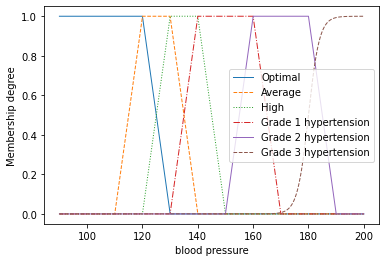

In [6]:
FS.plot_variable("Blood pressure")

#### Fuzzy variables for the blood pressure

In [7]:
H_1 = FuzzySet(function=Trapezoidal_MF(a=100, b=100, c = 120, d = 130), term = "Optimal")
H_2 = FuzzySet(function=Trapezoidal_MF(a=110, b=120, c = 130, d = 140), term = "Average")
H_3 = FuzzySet(function=Trapezoidal_MF(a=120, b=130, c = 140, d = 150), term = "High")
H_4 = FuzzySet(function=Trapezoidal_MF(a=130, b=140, c = 160, d = 170), term = "Grade 1 hypertension")
H_5 = FuzzySet(function=Trapezoidal_MF(a=150, b=160, c = 180, d = 190), term = "Grade 2 hypertension")
H_6 = FuzzySet(function=Sigmoid_MF(c=180, a =0.5 ), term = "Grade 3 hypertension")
FS.add_linguistic_variable("Heart beat", LinguisticVariable([H_1, H_2, H_3, H_4, H_5, H_6], concept="Heart beat", universe_of_discourse=[90,200]))

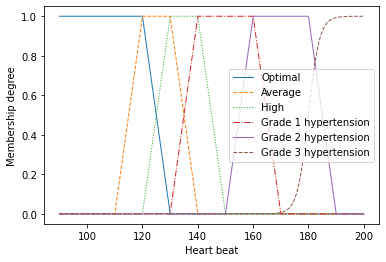

In [8]:
FS.plot_variable("Heart beat")

#### Fuzzy variables for the Glucose level

In [9]:
G_1 = FuzzySet(function=Trapezoidal_MF(a=100, b=100, c = 120, d = 130), term = "Optimal")
G_2 = FuzzySet(function=Trapezoidal_MF(a=110, b=120, c = 130, d = 140), term = "Average")
G_3 = FuzzySet(function=Trapezoidal_MF(a=120, b=130, c = 140, d = 150), term = "High")
G_4 = FuzzySet(function=Trapezoidal_MF(a=130, b=140, c = 160, d = 170), term = "Grade 1 hypertension")
G_5 = FuzzySet(function=Trapezoidal_MF(a=150, b=160, c = 180, d = 190), term = "Grade 2 hypertension")
G_6 = FuzzySet(function=Sigmoid_MF(c=180, a =0.5 ), term = "Grade 3 hypertension")
FS.add_linguistic_variable("Glucose", LinguisticVariable([G_1, G_2, G_3, G_4, G_5, G_6], concept="Glucose", universe_of_discourse=[90,200]))

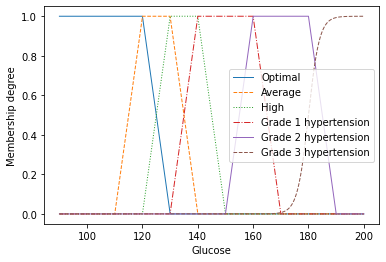

In [10]:
FS.plot_variable("Glucose")

#### Fuzzy variables for the glucose level

In [11]:
G_1 = FuzzySet(function=Trapezoidal_MF(a=100, b=100, c = 120, d = 130), term = "Optimal")
G_2 = FuzzySet(function=Trapezoidal_MF(a=110, b=120, c = 130, d = 140), term = "Average")
G_3 = FuzzySet(function=Trapezoidal_MF(a=120, b=130, c = 140, d = 150), term = "High")
G_4 = FuzzySet(function=Trapezoidal_MF(a=130, b=140, c = 160, d = 170), term = "Grade 1 hypertension")
G_5 = FuzzySet(function=Trapezoidal_MF(a=150, b=160, c = 180, d = 190), term = "Grade 2 hypertension")
G_6 = FuzzySet(function=Sigmoid_MF(c=180, a =0.5 ), term = "Grade 3 hypertension")
FS.add_linguistic_variable("Leukocyte", LinguisticVariable([G_1, G_2, G_3, G_4, G_5, G_6], concept="Leukocyte", universe_of_discourse=[90,200]))

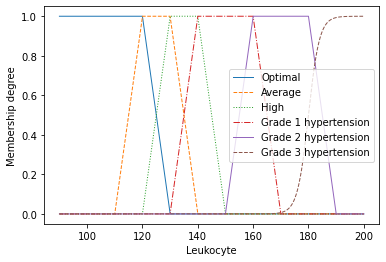

In [12]:
FS.plot_variable("Leukocyte")

### output functions

In [13]:
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=30), term="Low prio")
T_2 = FuzzySet(function=Triangular_MF(a=30, b=50, c=60), term="Average prio")
T_3 = FuzzySet(function=Triangular_MF(a=60, b=80, c=90), term="High prio")
T_4 = FuzzySet(function=Trapezoidal_MF(a=90, b=100, c=100, d=100), term="PANIC")
FS.add_linguistic_variable("Prio", LinguisticVariable([T_1, T_2, T_3, T_4], universe_of_discourse=[0,100]))

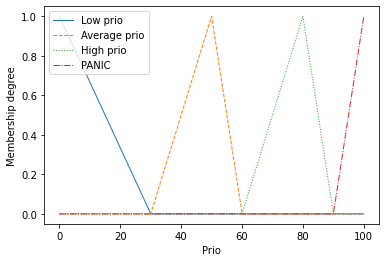

In [14]:
FS.plot_variable("Prio")